# Title

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- The goal of this project is to create a seamless process for predicting diabetes by building a machine learning model that analyzes various health parameters. 


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/saurabh00007/diabetescsv
- The data consists of 9 column and 2000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Import the CSV Data as Pandas DataFrame

In [66]:
data = pd.read_csv("dataset\kaggle_diabetes.csv")

#### Show Top 5 Records

In [67]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


Data shape

In [68]:
data.shape

(2000, 9)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check the target 

### 3.1 Check Missing values

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates


In [13]:
data.duplicated().sum()

1256

#### We have 1256 duplicated raw data from 2k !

### 3.3 Check data types

In [72]:
data.info()
data.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


int64      7
float64    2
Name: count, dtype: int64

#### We have only numerical Data, 7 integer type and 2 float type

### 3.4 Checking the number of unique values of each column

In [73]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

### 3.5 Check statistics of data set

In [47]:
summary = data.describe()

# Adding the mode to the statistics is always a good practice
modes = data.mode()

# This is just a code that add the mode to the summary dataframe
row_mode = {} # Setting up the dictionnary of the new modes raw 
for key, val in zip(data.columns.to_list(), modes.iloc[0].to_list()):
    row_mode[key] = val
summary.loc['mode'] = row_mode
summary


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000
mode,1.000000,99.000000,74.000000,0.000000,0.000000,31.200000,0.258000,22.000000,0.000000


#### Insight on each variable 
- 1. Pregnancies : Mean (3.703500) > Median (3.0) skewed distribution
    - Recommendation:
        - Investigate individuals with unusually high values (e.g., 17 pregnancies) for potential data entry errors or unique patterns.
        - Consider categorizing pregnancies into ranges (e.g., 0-3, 4-7, etc.) for predictive modeling.
- 2. Glucose : Mean slightly close to median suggesting a relatively symmetric distribution excluding outliers.
    - Recommendation : 
        - Zero values : Handling zeros as missing values since glucose cannot realistically be 0.
- 3. BloodPressure : Mean (69.145500) < Median (72.000000), Mode so its a right skewed ditribution
    - Recommendation : 
        - Treating zeros as missing values and impute.
        - Investigate whether extreme values represent hypertensive patients.
- 4. SkinThickness : Mean slightly close to median but we have a lot of zero values too.
    - Recommendation : 
        - Zero values likely represent missing data; impute accordingly.
        - Investigate if extreme values (e.g., 110 mm) are biologically plausible or data error (if its realistic)
- 5. Insulin : Mean: 80.25 µU/mL, with an extremely wide range (0–744) and Median: 40 µU/mL, indicating significant skewness from high outliers.
    - Recommendation : 
        - Investigating zero insulin levels if missing values.
        - Applying log-transformation to stabilize variance for predictive modeling.
        - Considering binning values (e.g., low, normal, high) based on clinical thresholds.
- 6. BMI Body Mass Index: Mean: 32.19, with a minimum of 0 and a maximum of 80.6 and Median: 32.3, aligning well with the mean, suggesting a nearly symmetric distribution excluding zeros.
    - Recommendation : 
        - Treating BMI values of 0 as missing and impute them.
        - Investigate extremely high values (e.g., 80.6) for biological plausibility.
        
- 7. DiabetesPedigreeFunction: Mean 0.471, with a range from 0.078 to 2.42 and Median: 0.376, with a relatively small standard deviation, indicating a tight distribution.
    - Recommendation : 
        - Standardize the feature to ensure consistent scaling with other variables.
        - Investigate whether outliers >2 represent significant genetic predispositions.

- 8. Age: Mean: 33 years, with a minimum of 21 and a maximum of 81 and Median: 29 years, indicating skewness due to older individuals.
    - Recommendation : 
        - Create age categories (e.g., <30, 30–50, >50) to explore patterns across age groups.
        - Consider the relationship between age and diabetes outcome in further analysis.


    
        
        
        

 

### 3.6 Check Target

In [74]:
target = data[['Outcome']]
target.value_counts(normalize=True)

Outcome
0          0.658
1          0.342
Name: proportion, dtype: float64

Binnary Outcome : 0 for non diabete 1 for having diabete
- 65,8% are of class 0. 
- 34,2% for class 1.
- Slightly unbalenced classes 

### 4. Exploring Data ( Visualization ) 
- Histogram
- Kernel Distribution Function (KDE)

### 4.1 Univariate Analysis
- Visualizing the distribution of each feature: Using histograms or kernel density plots to examine the distributions.
- Separating distributions for each class (Outcome=0 vs. Outcome=1) to observe patterns.
- Statistical summaries per class:
    - Group by Outcome and calculate mean, median, and variance for each feature.

### 4.2 Bivariate Analysis
Analyze the relationship between each feature and the target (Outcome):
- Boxplots: Plot each feature grouped by Outcome to see differences between classes.
- Violin plots: Visualize both the distribution and spread of values for features across classes.

- Correlation Analysis:
    - Compute Pearson/Spearman correlation between numerical features and Outcome.
    - Use a heatmap to visualize correlations between all numerical features and highlight multicollinearity.
- Perform hypothesis tests (e.g., t-tests or Mann-Whitney U tests) to assess if feature distributions differ significantly between classe

### 4.3 Multivariate Analysis
- Pairwise plots: Use scatterplot matrices (sns.pairplot) to observe relationships between features, coloring by Outcome.
- Dimensionality Reduction: Apply PCA or t-SNE to visualize clusters in a reduced feature space, distinguishing between Outcome=0 and Outcome=1.

#### 4.1.1 Histogram & KDE of the features

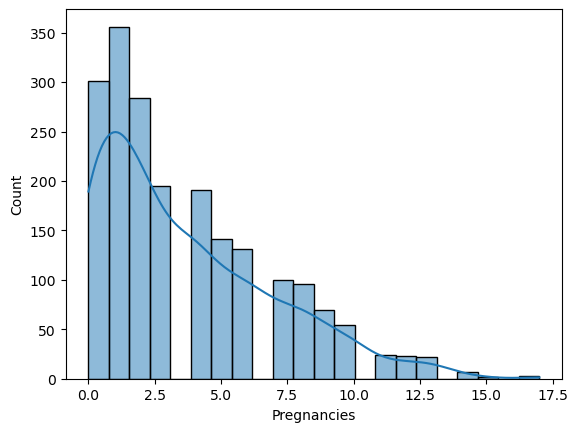

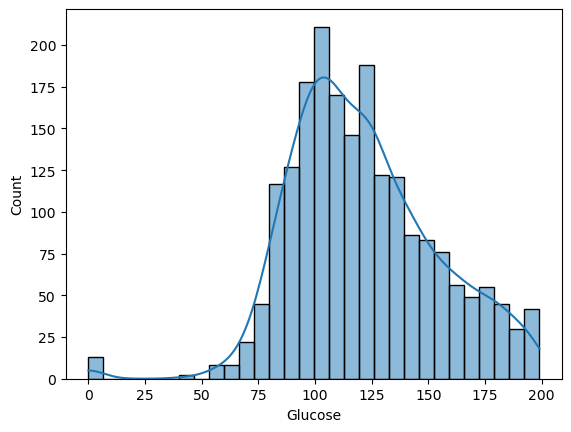

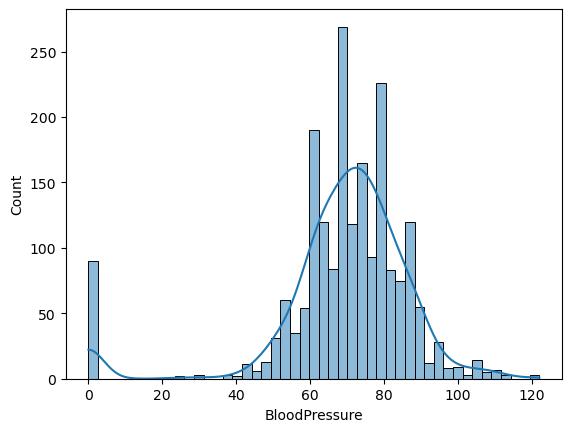

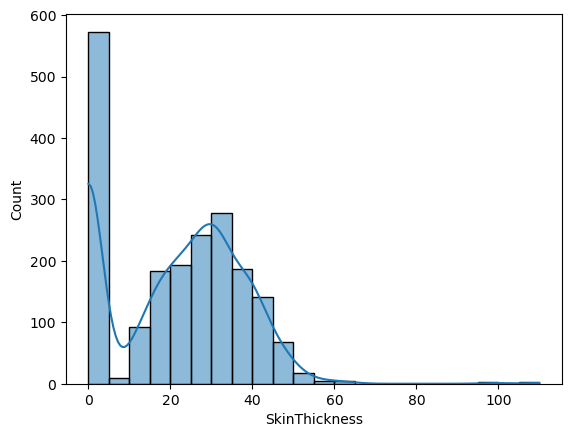

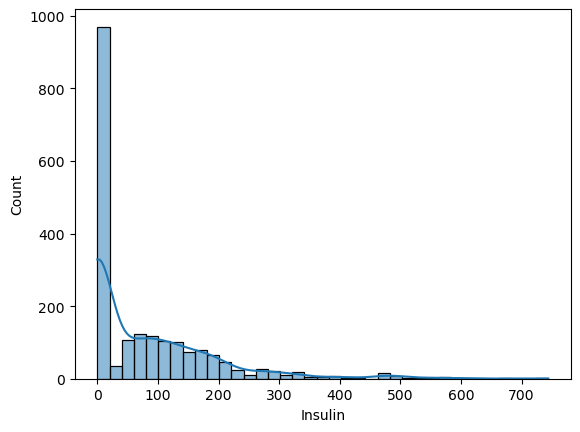

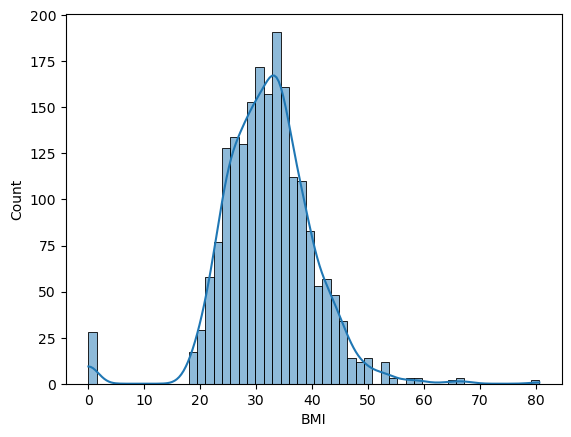

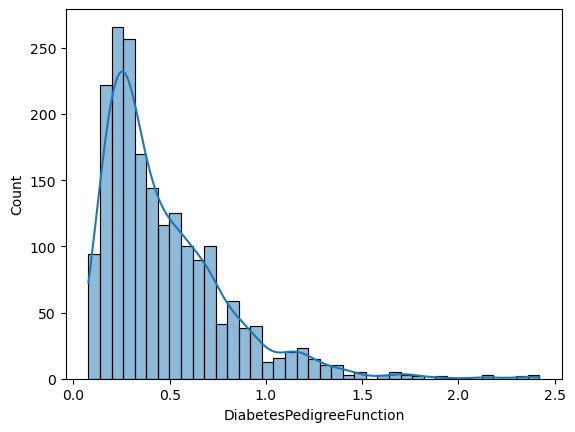

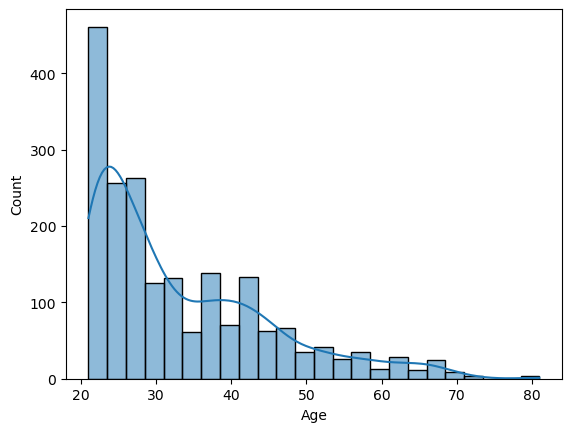

In [61]:
for col in data:
    if col != 'Outcome':
        plt.figure()
        sns.histplot(data[col], kde=True)

#### Insights : 


#### 4.1.2 Separating distributions for each class (Outcome=0 vs. Outcome=1) to observe patterns.

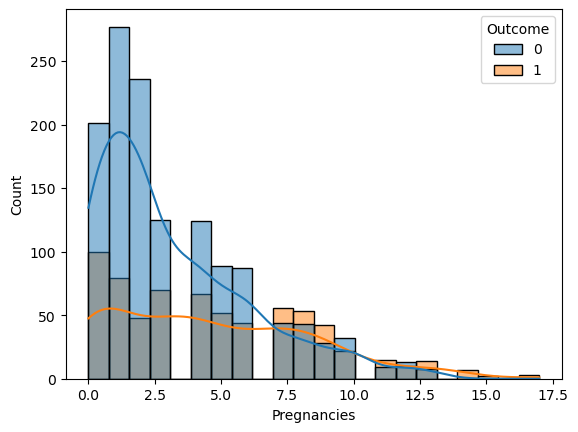

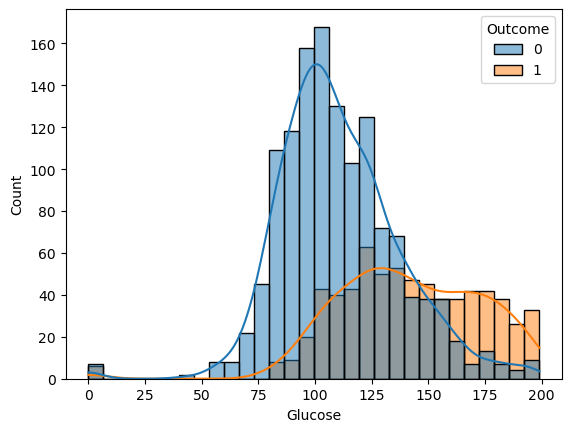

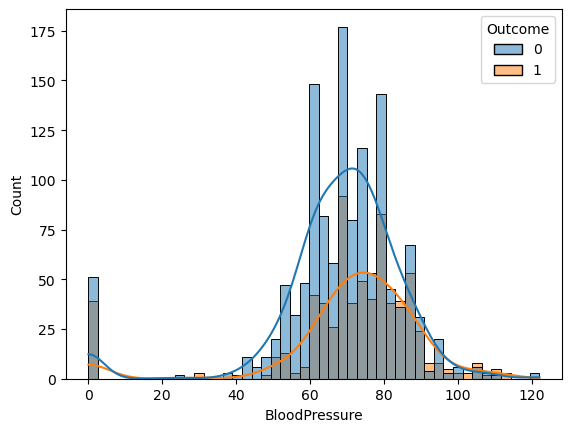

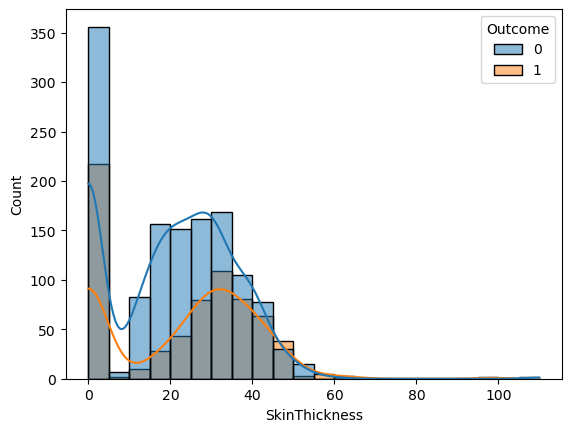

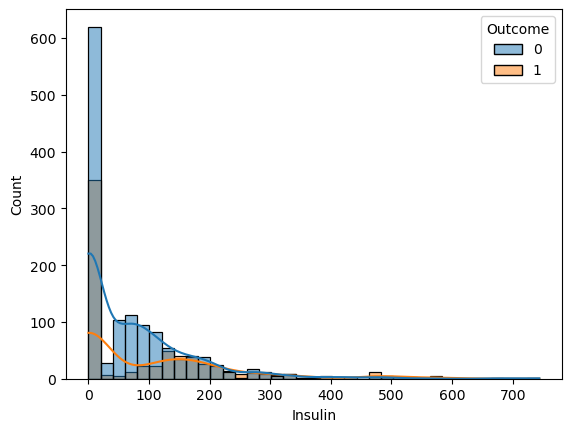

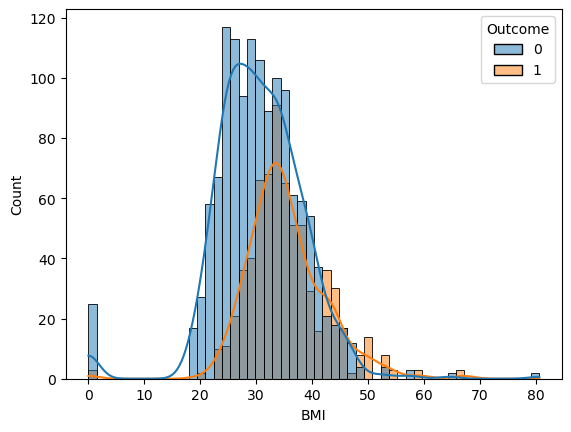

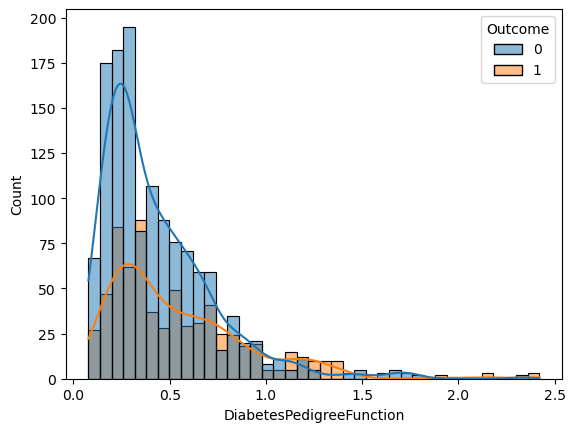

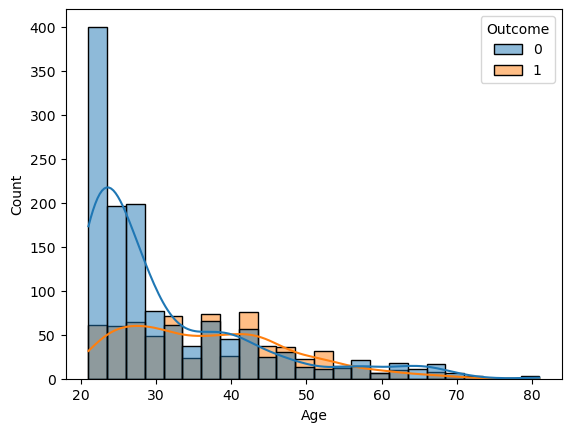

In [63]:
for col in data:
    if col != 'Outcome':
        plt.figure()
        sns.histplot(data, x=col, kde=True, hue='Outcome')

#### Insights : 

 #### 4.1.3 Statistical summaries per class

In [82]:
negative = data[data['Outcome']==0]
positive = data[data['Outcome']==1]

#### Negative 

In [81]:
display(negative.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.0
mean,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307,0.0
std,2.913526,26.495327,18.060800,15.192338,98.018597,8.160265,0.294268,11.721103,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.000000,62.000000,0.000000,0.000000,25.600000,0.234750,23.000000,0.0
50%,2.000000,107.000000,70.000000,22.000000,44.000000,30.100000,0.342000,26.000000,0.0
75%,5.000000,126.000000,78.000000,31.000000,106.000000,35.400000,0.571000,36.250000,0.0
max,13.000000,197.000000,122.000000,110.000000,744.000000,80.600000,2.329000,81.000000,0.0


#### Insights : 

#### Positive

In [80]:
display(positive.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.0
mean,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140,1.0
std,3.746358,32.027938,21.056467,17.612258,130.963804,7.162826,0.363689,10.924115,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.000000,120.000000,66.000000,0.000000,0.000000,30.900000,0.261000,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.300000,0.434000,36.000000,1.0
75%,7.000000,167.000000,82.000000,36.000000,167.000000,38.700000,0.727000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,600.000000,67.100000,2.420000,70.000000,1.0


#### Insights : 

### 4.2 Bivariate Analysis


Analyze the relationship between each feature and the target (Outcome):
- Boxplots: Plot each feature grouped by Outcome to see differences between classes.
- Violin plots: Visualize both the distribution and spread of values for features across classes.

- Correlation Analysis:
    - Compute Pearson/Spearman correlation between numerical features and Outcome.
    - Use a heatmap to visualize correlations between all numerical features and highlight multicollinearity.
- Perform hypothesis tests (e.g., t-tests or Mann-Whitney U tests) to assess if feature distributions differ significantly between classe

### 4.2.1 Boxplots and violinplots grouped by Outcome


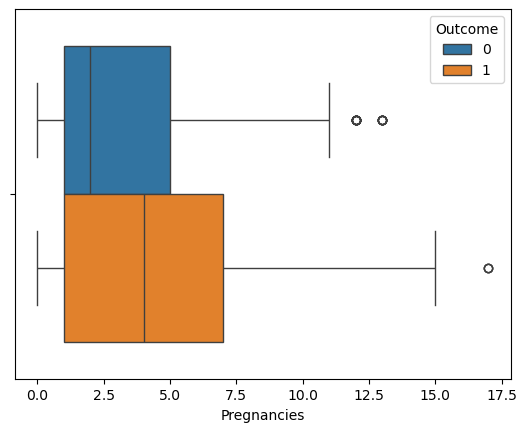

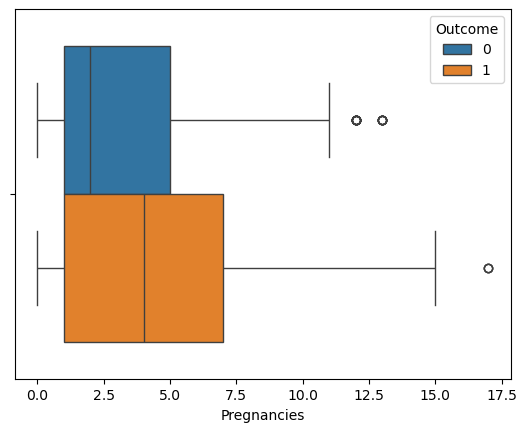

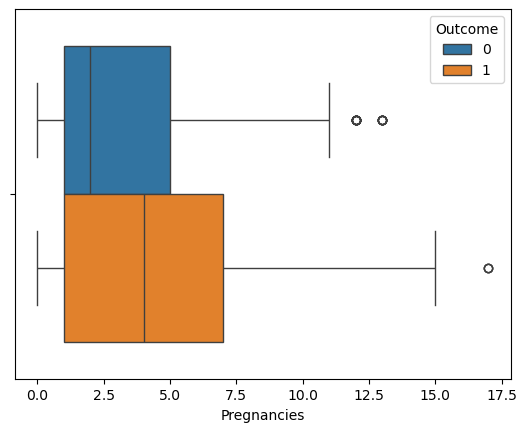

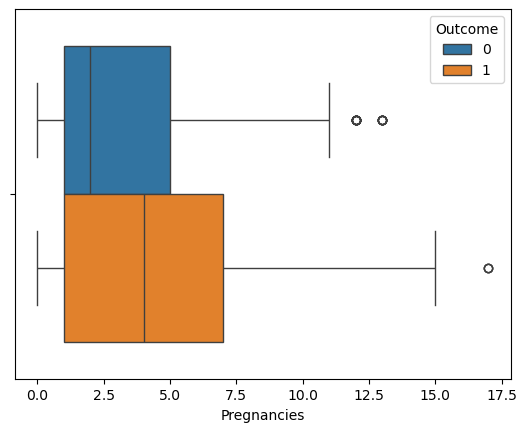

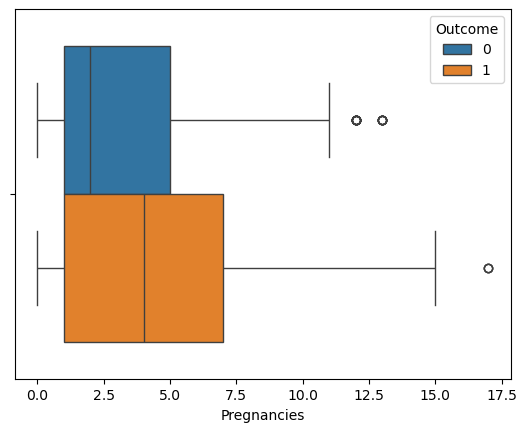

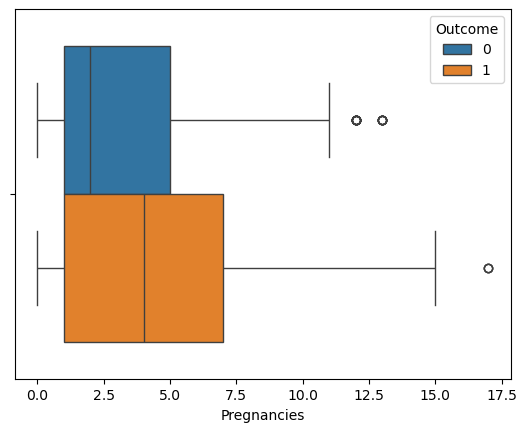

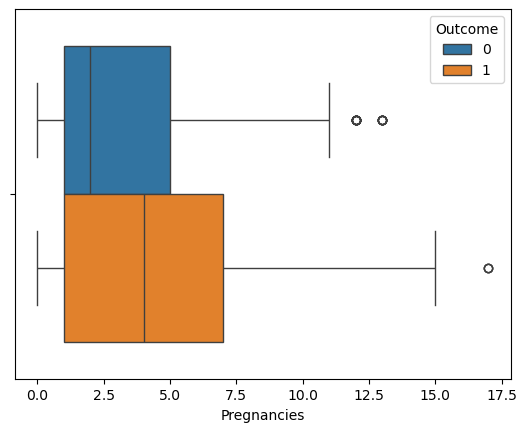

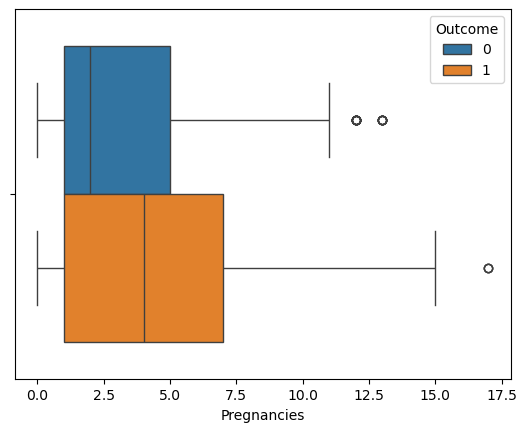

In [84]:
for col in data:
    if col != 'Outcome':
        plt.figure()
        sns.boxplot(data, x='Pregnancies', hue='Outcome')

#### Insights : 

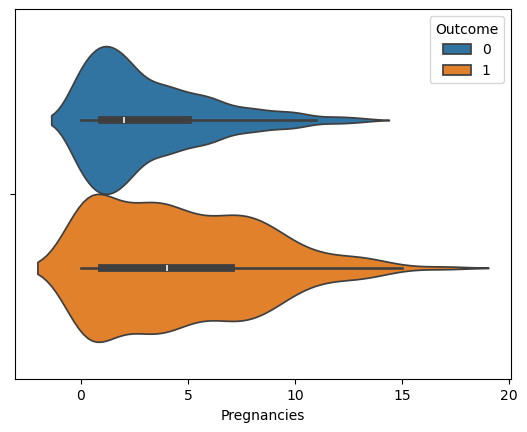

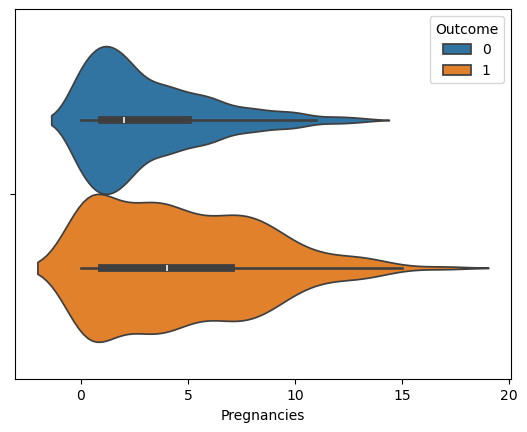

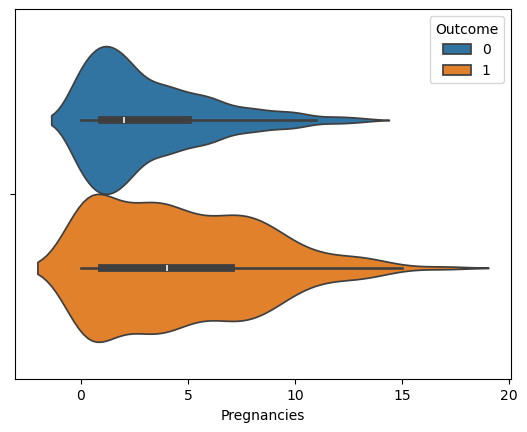

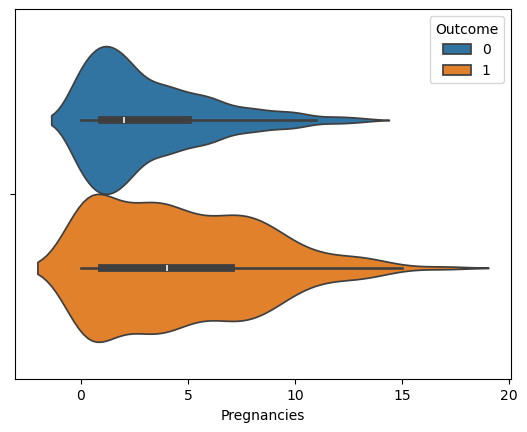

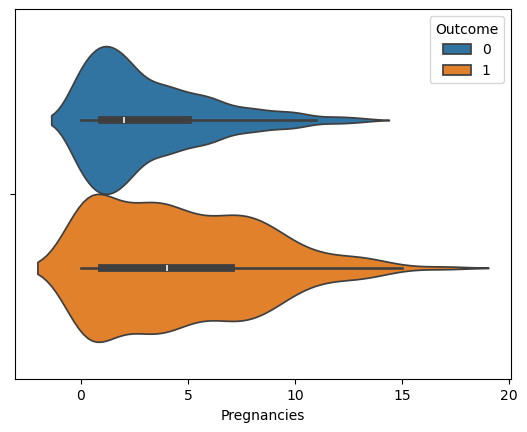

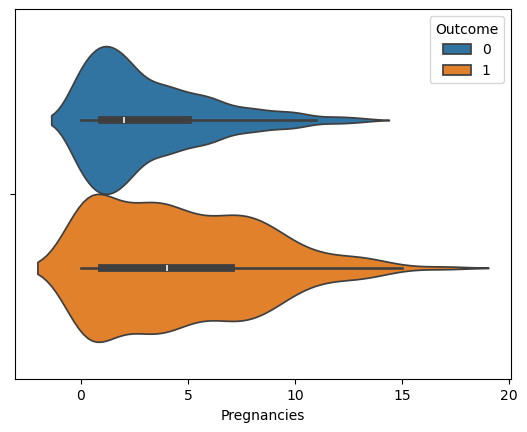

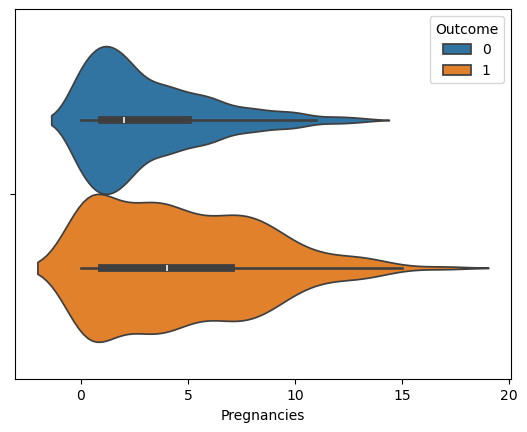

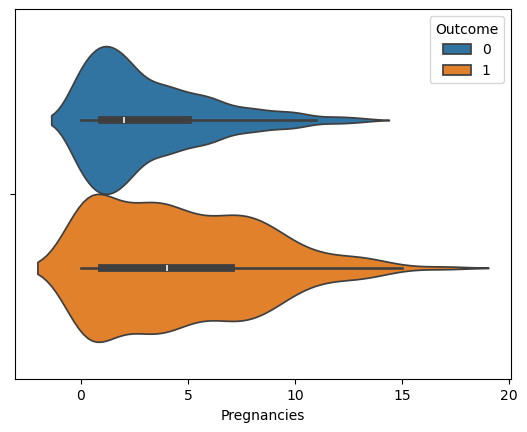

In [85]:
for col in data:
    if col != 'Outcome':
        plt.figure()
        sns.violinplot(data, x='Pregnancies', hue='Outcome')

#### Insights : 

### 4.2.2 Correlation Analysis:

#### Use a heatmap to visualize correlations between all numerical features and highlight multicollinearity.

<Axes: >

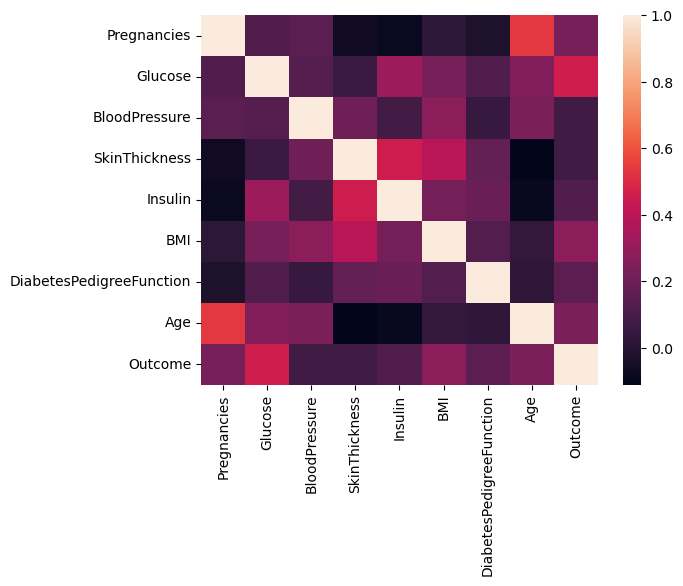

In [86]:
sns.heatmap(data.corr())

#### Insights : 

#### Computing Pearson/Spearman correlation between numerical features and Outcome.

In [87]:
pearson_corr = data.corr(method='pearson')['Outcome'].sort_values(ascending=False)
print("Pearson Correlation with Outcome:")
print(pearson_corr)

# Compute Spearman correlation
spearman_corr = data.corr(method='spearman')['Outcome'].sort_values(ascending=False)
print("\nSpearman Correlation with Outcome:")
print(spearman_corr)

Pearson Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.458421
BMI                         0.276726
Age                         0.236509
Pregnancies                 0.224437
DiabetesPedigreeFunction    0.155459
Insulin                     0.120924
SkinThickness               0.076040
BloodPressure               0.075958
Name: Outcome, dtype: float64

Spearman Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.471294
Age                         0.310411
BMI                         0.299805
Pregnancies                 0.195180
BloodPressure               0.154092
DiabetesPedigreeFunction    0.148650
SkinThickness               0.094745
Insulin                     0.062963
Name: Outcome, dtype: float64


### 4.2.3 Perform hypothesis tests (e.g., t-tests or Mann-Whitney U tests) to assess if feature distributions differ significantly between classe


#### Insights : 